In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # Python defacto plotting library
%matplotlib inline 
import nltk
from nltk import pos_tag 
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [ ]:
fake = pd.read_csv('Fake.csv')
true = pd.read_csv('True.csv')

In [ ]:
fake.head(5)

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [ ]:
tagged_fake_news_title = fake['title'].str.split().map(pos_tag) 
tagged_true_news_title = true['title'].str.split().map(pos_tag) 


In [ ]:
tagged_fake_news_text = fake['text'].str.split().map(pos_tag) 
tagged_true_news_text= true['text'].str.split().map(pos_tag) 


KeyboardInterrupt: ignored

In [ ]:
tagged_fake_news_title

0        [(Donald, NNP), (Trump, NNP), (Sends, VBZ), (O...
1        [(Drunk, NNP), (Bragging, NNP), (Trump, NNP), ...
2        [(Sheriff, NN), (David, NNP), (Clarke, NNP), (...
3        [(Trump, NNP), (Is, VBZ), (So, RB), (Obsessed,...
4        [(Pope, NNP), (Francis, NNP), (Just, NNP), (Ca...
                               ...                        
23476    [(McPain:, NNP), (John, NNP), (McCain, NNP), (...
23477    [(JUSTICE?, NNP), (Yahoo, NNP), (Settles, NNP)...
23478    [(Sunnistan:, NNP), (US, NNP), (and, CC), (All...
23479    [(How, WRB), (to, TO), (Blow, VB), ($700, NNP)...
23480    [(10, CD), (U.S., NNP), (Navy, NNP), (Sailors,...
Name: title, Length: 23481, dtype: object

In [ ]:
def count_tags(title_with_tags):
    tag_count = {}
    for word, tag in title_with_tags:
        if tag in tag_count:
            tag_count[tag] += 1
        else:
            tag_count[tag] = 1
    return(tag_count)
tagged_fake_news_title.map(count_tags).head()


0     {'NNP': 6, 'VBZ': 2, 'RP': 1, 'VBG': 2, 'DT': 1}
1                                           {'NNP': 8}
2    {'NN': 1, 'NNP': 8, 'DT': 2, 'IN': 1, 'VBG': 1...
3    {'NNP': 5, 'VBZ': 2, 'RB': 2, 'JJ': 1, 'PRP': ...
4    {'NNP': 7, 'VBD': 1, 'RP': 1, 'IN': 1, 'PRP$': 1}
Name: title, dtype: object

In [ ]:
tagged_true_news_title.map(count_tags).head()

0    {'IN': 1, 'NNP': 1, 'NN': 4, 'NNPS': 1, 'VBP':...
1    {'NNP': 3, 'JJ': 1, 'TO': 1, 'VB': 1, 'NN': 1,...
2    {'JJ': 1, 'NNP': 4, 'NN': 2, 'POS': 1, 'VB': 1...
3      {'NNP': 3, 'NN': 2, 'VBD': 1, 'IN': 1, 'JJ': 2}
4    {'NN': 2, 'VBZ': 1, 'NNP': 3, 'TO': 1, 'VB': 1...
Name: title, dtype: object

In [ ]:
tagged_fake_news_text.map(count_tags).head()

0    {'NNP': 98, 'RB': 32, 'VB': 24, 'JJ': 36, 'DT'...
1    {'NNP': 59, 'VBZ': 8, 'VBG': 10, 'TO': 9, 'VB'...
2    {'IN': 57, 'NNP': 110, 'PRP': 36, 'VBD': 18, '...
3    {'IN': 40, 'NNP': 67, 'NN': 85, 'VBD': 12, 'PR...
4    {'NNP': 47, 'VBD': 18, 'PRP$': 14, 'JJ': 21, '...
Name: text, dtype: object

In [ ]:
tagged_true_news_text.map(count_tags).head()

0    {'NNP': 95, ':': 4, 'DT': 67, 'NN': 120, 'IN':...
1    {'NNP': 79, ':': 3, 'NN': 101, 'NNS': 37, 'MD'...
2    {'NNP': 81, ':': 1, 'DT': 47, 'JJ': 30, 'NN': ...
3    {'NNP': 75, ':': 1, 'NN': 54, 'VBD': 25, 'DT':...
4    {'NNP': 122, ':': 1, 'VBD': 24, 'IN': 112, 'DT...
Name: text, dtype: object

In [ ]:
tagged_true_news_title = pd.DataFrame(tagged_true_news_title)
tagged_true_news_title['tag_counts'] = tagged_true_news_title['title'].map(count_tags)
tag_set = list(set([tag for tags in tagged_true_news_title['tag_counts'] for tag in tags]))
for tag in tag_set:
    tagged_true_news_title[tag] = tagged_true_news_title['tag_counts'].map(lambda x: x.get(tag, 0))
title = 'Frequency of POS Tags in Fake News Titles'    
print(tagged_true_news_title[tag_set].sum().sort_values())

,           1
UH          4
WP$         4
$           4
SYM        10
PDT        13
EX         14
RBS        15
''         43
WDT        75
FW        101
WRB       128
RBR       150
WP        190
JJS       309
:         360
PRP$      447
JJR       494
POS       601
RP        664
PRP       787
NNPS      843
CC        955
MD       1964
DT       1994
VBN      2173
VBD      2661
RB       2834
CD       2965
VBG      3243
VBP      3609
TO       7798
VB       8778
VBZ     10894
NNS     17072
JJ      17180
IN      23474
NN      46762
NNP     53582
dtype: int64


In [ ]:
tagged_fake_news_title = pd.DataFrame(tagged_fake_news_title)
tagged_fake_news_title['tag_counts'] = tagged_fake_news_title['title'].map(count_tags)
tag_set = list(set([tag for tags in tagged_fake_news_title['tag_counts'] for tag in tags]))
for tag in tag_set:
    tagged_fake_news_title[tag] = tagged_fake_news_title['tag_counts'].map(lambda x: x.get(tag, 0))
title = 'Frequency of POS Tags in Fake News Titles'    
print(tagged_fake_news_title[tag_set].sum().sort_values())

''           1
,            4
UH           5
POS          6
.           12
FW          31
PDT         35
$           38
:           40
RBS         46
RBR         75
EX          82
JJS        165
WDT        271
JJR        281
MD         666
RP         668
WP         757
WRB       1306
VBN       1339
NNPS      2269
PRP$      2564
VBP       2633
CD        2790
RB        2972
CC        3578
NNS       3635
PRP       3999
VBD       4181
VBG       4181
VBZ       5017
VB        5764
JJ        6155
DT        8635
TO        8684
NN       13888
IN       28951
NNP     230217
dtype: int64


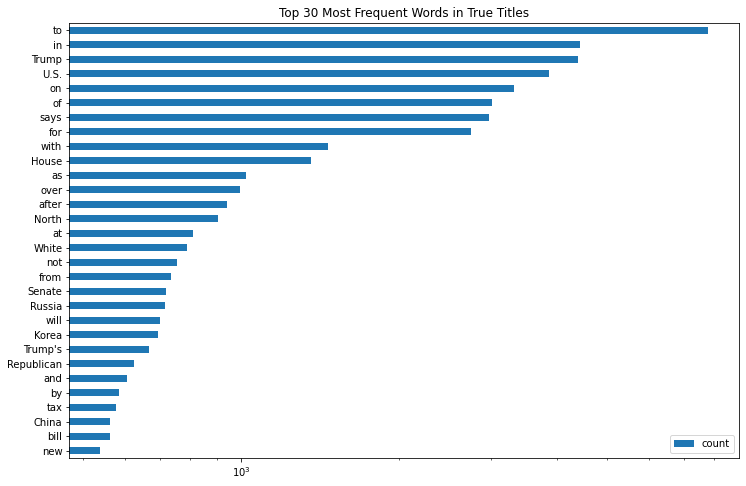

In [ ]:
vocab = {}
for row in tagged_true_news_title['title']:
    for word, tag in row:
        if word in vocab:
            vocab[word] += 1
        else:
            vocab[word] = 1

vocab_df = pd.DataFrame.from_dict(vocab, orient='index')
vocab_df.columns = ['count']
size = 30
title = 'Top {} Most Frequent Words in True Titles'.format(size)
vocab_df.sort_values(by='count').tail(size).plot(kind='barh', logx=True, figsize=(12,8), title=title)

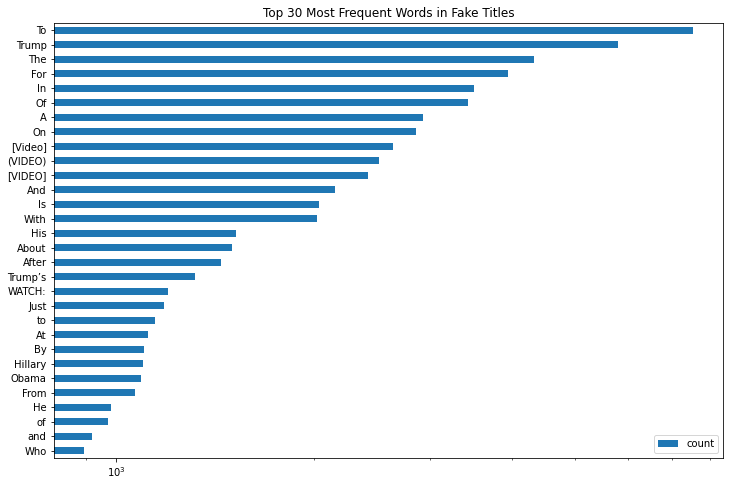

In [ ]:
vocab = {}
for row in tagged_fake_news_title['title']:
    for word, tag in row:
        if word in vocab:
            vocab[word] += 1
        else:
            vocab[word] = 1

vocab_df = pd.DataFrame.from_dict(vocab, orient='index')
vocab_df.columns = ['count']
size = 30
title = 'Top {} Most Frequent Words in Fake Titles'.format(size)
vocab_df.sort_values(by='count').tail(size).plot(kind='barh', logx=True, figsize=(12,8), title=title)

In [ ]:
def generate_ngrams(text, n=2):
    words = text.split()
    iterations = len(words) - n + 1
    for i in range(iterations):
       yield words[i:i + n]

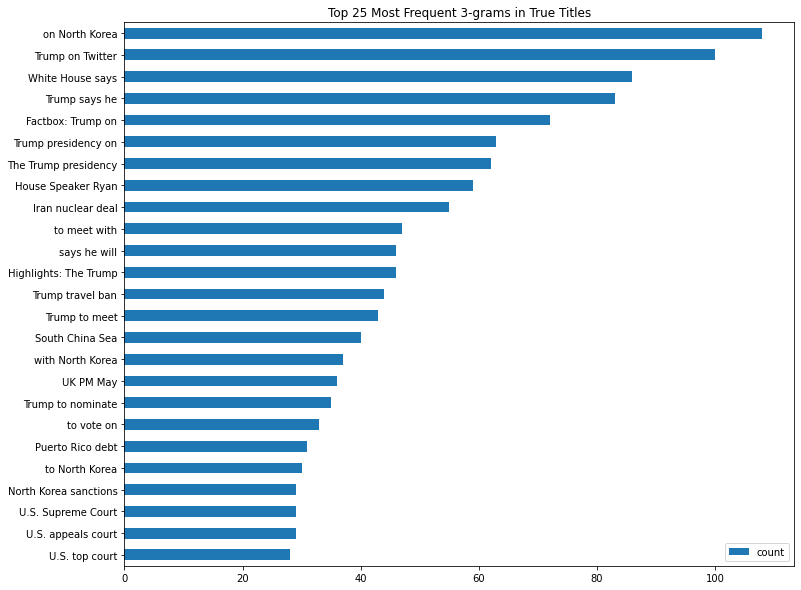

In [ ]:
n = 3 # n is the length of the ngram, 2 = bigram, 3 = trigram, etc.
ngrams = {}
for title in true['title']:
    for ngram in generate_ngrams(title, n):
        ngram = ' '.join(ngram)
        if ngram in ngrams:
            ngrams[ngram] += 1
        else:
            ngrams[ngram] = 1

ngrams_df_true = pd.DataFrame.from_dict(ngrams, orient='index')
ngrams_df_true.columns = ['count']
size = 25
title = 'Top {} Most Frequent {}-grams in True Titles'.format(size, n)
ngrams_df_true.sort_values(by='count').tail(size).plot(kind='barh', logx=False, figsize=(12,10), title=title)

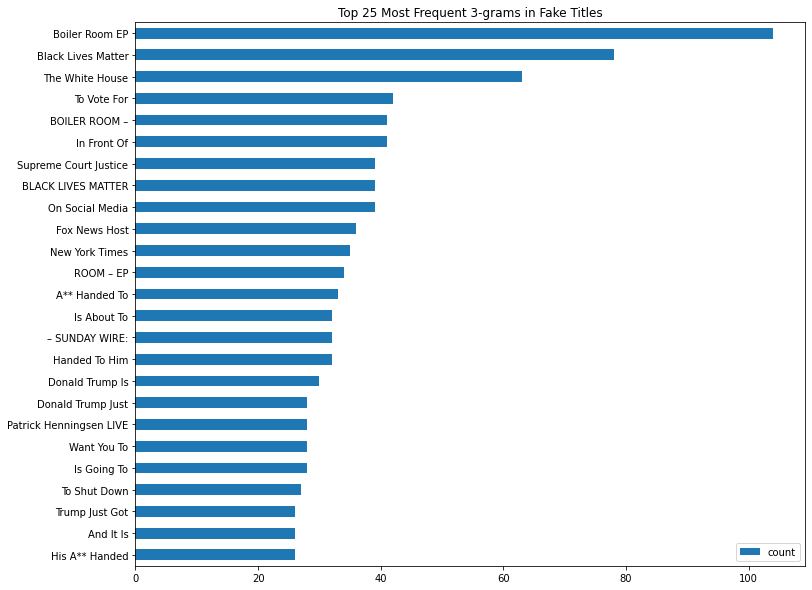

In [ ]:
n = 3 # n is the length of the ngram, 2 = bigram, 3 = trigram, etc.
ngrams = {}
for title in fake['title']:
    for ngram in generate_ngrams(title, n):
        ngram = ' '.join(ngram)
        if ngram in ngrams:
            ngrams[ngram] += 1
        else:
            ngrams[ngram] = 1

ngrams_df_fake = pd.DataFrame.from_dict(ngrams, orient='index')
ngrams_df_fake.columns = ['count']
size = 25
title = 'Top {} Most Frequent {}-grams in Fake Titles'.format(size, n)
ngrams_df_fake.sort_values(by='count').tail(size).plot(kind='barh', logx=False, figsize=(12,10), title=title)

In [ ]:
print(ngrams_df_fake.index)
tagged_trigrams_fake = ngrams_df_fake.index.str.split().map(pos_tag) 
tagged_trigrams_true = ngrams_df_true.index.str.split().map(pos_tag) 

Index(['Donald Trump Sends', 'Trump Sends Out', 'Sends Out Embarrassing',
       'Out Embarrassing New', 'Embarrassing New Year’s', 'New Year’s Eve',
       'Year’s Eve Message;', 'Eve Message; This', 'Message; This is',
       'This is Disturbing',
       ...
       'Troubled King: Chicago’s', 'King: Chicago’s Rahm',
       'Chicago’s Rahm Emanuel', 'Rahm Emanuel Desperate',
       'Emanuel Desperate to', 'Desperate to Save', 'to Save His',
       'Save His 2020', 'His 2020 Presidential', '2020 Presidential Run'],
      dtype='object', length=205551)


In [ ]:
import pickle
with open('Tagged_fake_news_trigrams_title.pickle','wb') as f:
    pickle.dump(tagged_trigrams_fake, f)


In [ ]:
import pickle
with open('Tagged_true_news_trigrams_title.pickle','wb') as f:
    pickle.dump(tagged_trigrams_fake, f)

In [ ]:
import pickle
with open('Tagged_fake_news_title.pickle','wb') as f:
    pickle.dump(tagged_fake_news_title, f)


In [ ]:
with open('Tagged_fake_news_text.pickle','wb') as f:
    pickle.dump(tagged_fake_news_text, f)

In [ ]:
with open('Tagged_true_news_title.pickle','wb') as f:
    pickle.dump(tagged_true_news_title, f)

In [ ]:
with open('Tagged_true_news_text.pickle','wb') as f:
    pickle.dump(tagged_true_news_text, f)